<center>
<h4>Diplomatura en CDAAyA 2019 - FaMAF - UNC</h4>
<h1>Predicción del Nivel de Pobreza de Hogares en Costa Rica</h1>
<h3>Aprendizaje Automático No Supervisado</h3>
</center>
</left>
<h4>Julieta Bergamasco</h4>
</left>

### Introducción

En la siguiente notebook se presentará la consigna a seguir para el quinto y último práctico del proyecto, correspondiente a la materia Aprendizaje Automático No Supervisado. El objetivo consiste en aplicar distintas técnicas de análisis exploratorio de datos (EDA) al dataset, de modo de encontrar patrones sistematizables. Es decir que, a los fines de este práctico, por un momento nos olvidaremos de nuestro problema original de clasificación múltiple y de que tenemos datos etiqutados con sus respectivas clases.

Luego, una vez aplicadas las técnicas de aprendizaje no supervisado y del cálculo de las métricas pertinentes, podremos recurrir a las etiquetas de clases con el fin de contrastar los resultados obtenidos.

A pesar de que no serán utilizadas las etiquetas en una primera instancia, será importante evaluar el desbalance de clases y qué decisiones tomarán al respecto.

Para ello, comenzaremos con las importaciones pertinentes.

### Importaciones

In [77]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import sklearn as skl

from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split

random_state = 0
np.random.seed(0)  # Para mayor determinismo

In [78]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

## Consigna para Aprendizaje Automático No Supervisado

### I. Preprocesamiento

A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes. A continuación se detallan los pasos a seguir para el preprocesamiento de los datos.

#### 1. Obtención del Dataset

Cargar el conjunto de entrenamiento original. Luego, eliminar las columnas calculadas en base a features preexistentes.

#### 2. Aplicar Script de Curación

Inicialmente, con el objetivo de preparar los datos que alimentarán los modelos de aprendizaje automático (ML) propuestos, deberán aplicar el script de curación obtenido en el segundo práctico.

#### 3. Análisis del Balance de Clases

En una primera instancia, podemos dejar que los algoritmos identifiquen patrones, sin necesidad de preocuparnos por el balance de clases.

En una etapa posterior, y aprovechando que tenemos las etiquetas, aplicarán los mismos algoritmos pero considerando el desbalance de clases en el dataset. Para ello, usar el parámetro `sample_weight` de `k_means`. Obtener conclusiones entre ambos resultados.

#### 4. Multicolinealidad Exacta y Variables Dummies

Las variables explicativas no deben estar muy correlacionadas entre ellas, ya que la variabilidad de una y otra estarán explicando la misma parte de variabilidad de la variable dependiente. Esto es lo que se conoce como multicolinealidad, lo cual deriva en la imposibilidad de estimar los parámetros cuando la misma es exacta o en estimaciones muy imprecisas cuando la misma es aproximada.

Dadas las características de nuestro dataset, nos encontramos con múltiples variables dummies. Analizar en qué casos resulta pertinente descartar la k-ésima dummie de cada categoría. ¿Qué creen que ocurrirá con estas variables al aplicar PCA?

#### 5. Clasificación a Nivel Hogar o a Nivel Individuo

A partir de análisis previos, sabemos que en nuestro problema la clasificación corresponde al hogar (y no al individuo). Es decir, cada hogar tendrá una única etiqueta. Por lo tanto, para aplicar los modelos, se presentan las siguientes opciones:

a. Quedarse sólo con los individuos jefes o jefas de hogar, y de éstos, con todas las variables asociadas que se repiten para el hogar. Asimismo, crear variables con medidas resumen para todas las variables que no se repitan por hogar.

b. Mantener el dataset a nivel individuo.

Del siguiente punto en adelante, **deberán resolver para ambos conjuntos de datos**. Posteriormente, podremos determinar cuál es el más apropiado para aplicar las técnicas de clasificación no supervisada.

#### 6. Creación de Nuevos Atributos

En esta etapa, pueden adicionar atributos calculados a partir de los datos preexistentes, que crean que son pertinentes a priori o que hayan encontrado interesantes por tener mayor correlación con la variable `Target`. Por ejemplo, una variable que represente los aparatos tecnológicos, la tasa de dependencia al cuadrado, años de escolaridad al cuadrado, tasa de dependencia por edad de la persona jefa de hogar o por la edad promedio del hogar, el logaritmo natural de la tasa de dependencia, entre otras.

#### 7. Normalización de Atributos

Es posible que sea necesario normalizar las features de nuestro dataset, dado que los algoritmos de clasificación no supervisada lo requieren. Aplicar al dataset la normalización de atributos que consideren adecuada.

#### 8. Mezca Aleatória y División en Train/Test

Finalmente, es recomendable que mezclen los datos aleatoriamente, dado que la inicialización influye en los resultados del modelo que se propone que implementen.

Respecto a la división en Train/Test, dado que se trata de un algoritmo de aprendizaje automático no supervisado, pueden omitir esta división, ya que estamos buscando patrones ocultos en los datos que reflejen las causas latentes.

---

A modo de ayuda, **en esta notebook encontrarán una especie de template** que sigue los pasos propuestos y que deberán ir completando.

Recuerden que la ciencia de datos es un **proceso circular, continuo y no lineal**. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.

### II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Una vez finalizada la etapa de preprocesamiento, se propone implementar, por un lado, una técnica de reducción de dimensionalidad para representar los datos y, por el otro, una técnica de clusterización.

#### 1. Descomposivión de Variables: Principal Component Analysis

Si bien la mayoría de nuestros atributos se tratan de variables binarias y PCA no es tan apropiado para este tipo de datasets, puede aplicarse esta técnica y ver que resulta.
A partir del análisis y la visualización de los datasets transformados por PCA, obtener conclusiones.

Adicionalmente, existe una técnica llamada Factor Analysis que puede ser más apropiada para este caso. Aplicarla y obtener conclusiones. Comparar con los resultados obtenidos previamente.

#### 2. K-Means Clustering

Aplicar K-Means tanto a los dataset originales como a los datasets transformados a partir de cualquiera de las técnicas anteriores.

Explorar distintas soluciones de clustering con diferentes parámetros, como iteraciones, número de clusters o métricas de distancia, y compararlas. Finalmente, para el modelo seleccionado:

- Calcular las métricas pertinentes sobre los clusters resultantes.
- Aplicando el método de Elbow, ¿cuál sería la cantidad óptima de clusters?
- Agregar a los dataset originales el cluster resultante de los modelos.
- Graficar diferentes variables de interés por cluster y por clase, y compararlos.
- Tomar ejemplos aleatorios y pensar por qué están en un cluster y no en otro.
- Calcular los centroides y tratar de mostrar qué tiene cada cluster cerca de su centroide. Obtener conclusiones.
- Contrastar la clasificación en clusters con las etiquetas de clases, tanto gráficamente como analítica. Si utilizan 4 clusters, elaborar una matriz de confusión.

### Entregables

El entregable de este práctico consiste en **esta misma Notebook**, pero con el preprocesamiento aplicado y las técnicas implementadas, agregando las explicaciones que crean pertinentes y las decisiones tomadas, en caso de corresponder.

Además, deberán agregar al PPT la síntesis de las principales conclusiones de éste práctico.

# Resolución

## I. Preprocesamiento

### 1. Carga de Datos

Para comenzar, importamos los datos que vamos a utilizar:

In [79]:
# Cargamos el dataset original en una variable
url_data_train = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/DatasetPobCR_Train.csv'
_ds = pd.read_csv(url_data_train)
_ds.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [80]:
# Cargamos el Dataset Fields en una variable, para tener la información de cada campo a mano
# Si hay nueva metadata, cargarla posteriormente
url_fields_info = 'https://github.com/jbergamasco/DiploDatos2019/raw/master/ProyectoPobrezaCostaRica/Dataset%20Fields.txt'
_data_fields = pd.read_csv(url_fields_info, sep='\t', encoding = 'cp1252')
_data_fields.head(5)

,Variable_name,Variable_description
0,v2a1,Monthly rent payment
1,hacdor,=1 Overcrowding by bedrooms
2,rooms,number of all rooms in the house
3,hacapo,=1 Overcrowding by rooms
4,v14a,=1 has bathroom in the household


Recuerden que la variable `Target` constituye nuestro objetivo original de predicción. Es la etiqueta de los datos de acuerdo al nivel de pobreza del hogar que habita cada individuo, según la siguiente escala o clases:

1 = pobreza extrema<br>
2 = pobreza moderada<br>
3 = hogares vulnerables<br>
4 = hogares no vulnerables<br>

In [81]:
# Eliminamos columnas que son features calculadas en base a otras features
_calc_feat = _ds.loc[:,'SQBescolari':'agesq'].columns
print('Columnas eliminadas: ', _calc_feat.values)
_ds.drop(columns = _calc_feat, inplace = True)

Columnas eliminadas:  ['SQBescolari' 'SQBage' 'SQBhogar_total' 'SQBedjefe' 'SQBhogar_nin'
 'SQBovercrowding' 'SQBdependency' 'SQBmeaned' 'agesq']


<div class="alert alert-block alert-info">
El dataset ya está **listo para trabajar!**
</div>

### 2. Aplicar Script de Curación

El siguiente paso implica aplicar el script que resultó del práctico anterior. También pueden adicionar campos calculados en base a otros atributos, según lo consideren pertinente.

In [82]:
from script_curacion import exec_script

_ds_reduced,_data_fields = exec_script(_ds, _data_fields)

/home/alain/miniconda3/envs/diplo/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/alain/Proyectos/Diplo DS/Mentoria_CostaRica/CostaRica/TP5/script_curacion.py:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  _ds_reduced[col]= pd.to_numeric(_ds_reduced[col],downcast='unsigned',errors='ignore')
/home/alain/miniconda3/envs/diplo/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)

### 3. Análisis de Balance de Clases

Evaluar el balance de clases. Dejar plasmadas las decisiones que tomen al respecto.

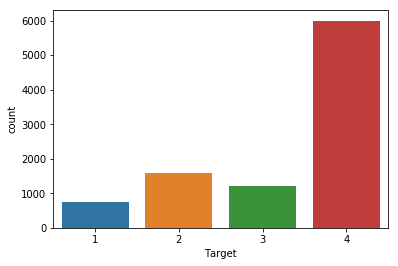

In [83]:
sns.countplot(x='Target', data = _ds)

### 4. Multicolinealidad Exacta y Variables Dummies

Decisiones respecto a las variables con multicolinealidad perfecta.

- Las decisiones tomadas respecto al a multicolinealidad exacta y variablas dummies fueron visualizadas en el práctico anterior y agregadas al script de curación del dataset.
- Se eliminó un feature de cada categoría binarizada.

### 5. Clasificación a Nivel Hogar o a Nivel Individuo

En este punto, crear un nuevo dataset, `_ds_hogar`, manteniendo únicamente los individuos jefe de hogar (```parentesco1 == 1```) y los atributos que se repitan por hogar. Para aquellos atributos individuales, crear medidas sintéticas por hogar relevantes (suma, promedio simple, promedio ponderado, máximo, mínimo, etc.).

Por ejemplo, para la escolaridad, mantendría la de la persona jefa de hogar y crearía otra (u otras) que indiquen la escolaridad promedio o la escolaridad promedio por adulto.

In [84]:
hogar_cols = ['idhogar','Renta','Exceso_habitaciones','Habitaciones', 'Tiene_banio','hogar_nin', 'hogar_adul',
               'hogar_mayor','refrig','paredblolad', 'paredzocalo', 'paredpreb', 'pareddes',
               'paredmad', 'paredzinc', 'paredfibras', 'pisomoscer',
               'pisocemento', 'pisoother', 'pisonatur', 
               'pisomadera', 'techozinc', 'techoentrepiso', 'techocane',
               'cielorazo', 'abastaguadentro', 'abastaguafuera',
               'Electridad_publica', 'Electridad_privada', 
               'Electridad_cooperativa','sanitario1', 'sanitario2', 'sanitario3', 'sanitario5',
               'energcocinar1', 'energcocinar2', 'energcocinar3',
               'elimbasu1', 'elimbasu2', 'elimbasu3',
               'elimbasu4', 'elimbasu5', 'epared1', 'epared2',
               'etecho1', 'etecho2', 'eviv1', 'eviv2',
               'bedrooms', 'tipovivi1', 'tipovivi2',
               'tipovivi3', 'tipovivi4', 'Central', 'Chorotega', 'Pacifico_Central',
               'Brunca', 'Huetar_Atlantica', 'area1', 
               'Tamanio_hogar_hhsize','Tiene_tablet','Cant_tablets','Cant_hom_menores_12','Cant_hom_mayores_12',
               'Total_hombres','Cant_muj_menores_12','Cant_muj_mayores_12',
               'Total_mujeres','Cant_indiv_menores_12','Cant_indiv_mayores_12','Total_indiv',
               'Tamanio_vivienda','Cant_habitantes_depend','Educ_jefe','Exceso_ambientes',
               'Indiv_x_ambientes','Tiene_pc','Tiene_tv','Tiene_cel','Cant_cel','Target']     


In [85]:
_ds_hogar = _ds_reduced.groupby(hogar_cols).agg({
    'female': 'sum',
    'Edad': 'mean',
    'dis': 'sum',
    'Anios_escolaridad_hechos':'sum',
    'Anios_escolaridad_faltantes':'sum',
    'Educ_media':'mean',
    'estadocivil1':'sum',
    'estadocivil2':'sum',
    'estadocivil3':'sum',
    'estadocivil4':'sum',
    'estadocivil5':'sum',
    'estadocivil6':'sum',
    'parentesco1':'sum',
    'parentesco2':'sum',
    'parentesco3':'sum',
    'parentesco4':'sum',
    'parentesco5':'sum',
    'parentesco6':'sum',
    'parentesco7':'sum',
    'parentesco8':'sum',
    'parentesco9':'sum',
    'parentesco10':'sum',
    'parentesco11':'sum',
    'instlevel1':'sum', 
    'instlevel2':'sum',
    'instlevel3':'sum', 
    'instlevel4':'sum', 
    'instlevel5':'sum',
    'instlevel6':'sum',
    'instlevel7':'sum', 
    'instlevel8':'sum'
}).reset_index()

In [86]:
_ds_hogar = _ds_hogar.rename(columns={
    'female': 'Cant_mujeres',
    'Edad': 'Edad_promedio',
    'dis': 'Cant_disc',
    'estadocivil1':'Cant_estadocivil1estadocivil1',
    'estadocivil2':'Cant_estadocivil2',
    'estadocivil3':'Cant_estadocivil3',
    'estadocivil4':'Cant_estadocivil4',
    'estadocivil5':'Cant_estadocivil5',
    'estadocivil6':'Cant_estadocivil6',
    'parentesco1':'Cant_parentesco1',
    'parentesco2':'Cant_parentesco2',
    'parentesco3':'Cant_parentesco3',
    'parentesco4':'Cant_parentesco4',
    'parentesco5':'Cant_parentesco5',
    'parentesco6':'Cant_parentesco6',
    'parentesco7':'Cant_parentesco7',
    'parentesco8':'Cant_parentesco8',
    'parentesco9':'Cant_parentesco9',
    'parentesco10':'Cant_parentesco10',
    'parentesco11':'Cant_parentesco11',
    'instlevel1':'Cant_instlevel1', 
    'instlevel2':'Cant_instlevel2',
    'instlevel3':'Cant_instlevel3', 
    'instlevel4':'Cant_instlevel4', 
    'instlevel5':'Cant_instlevel5',
    'instlevel6':'Cant_instlevel6',
    'instlevel7':'Cant_instlevel7', 
    'instlevel8':'Cant_instlevel8'
})


<div class="alert alert-block alert-warning">
<b>Recuerden:</b> Para aplicar clustering, sacar la variable `Target` de los datasets!
</div>

### 6. Normalización de Atributos

Aplicar al dataset la normalización de atributos que consideren adecuada.

- Normalizamos los atributos usando una distribución Gaussiana

In [87]:
standard_scaler = preprocessing.StandardScaler()

###### Normalizamos `_ds_hogar`

In [88]:
_ds_standar = _ds_hogar.select_dtypes(exclude=['object'])

_ds_standar = _ds_standar.drop(columns=['Target'],axis=0)
_cols_standar = _ds_standar.columns
standard_scaler.fit(_ds_standar.values)
_ds_standar = standard_scaler.transform(_ds_standar)
_ds_hogar[_cols_standar]= _ds_standar

###### Normalizamos `_ds_individuo`

In [89]:
_ds_individuo =_ds_reduced
_ds_standar = _ds_individuo.select_dtypes(exclude=['object'])

_ds_standar = _ds_standar.drop(columns=['Target'],axis=0)
_cols_standar = _ds_standar.columns
standard_scaler.fit(_ds_standar.values)
_ds_standar = standard_scaler.transform(_ds_standar)
_ds_individuo[_cols_standar]= _ds_standar

In [90]:
_ds_individuo.shape, _ds_hogar.shape

((9222, 118), (5074, 112))

In [91]:
_ds_individuo.head(5)

,Id,Edad,female,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Razon_Hombres_Total,Razon_Mujeres_Total,Razon_Ninios_Total,Razon_Adultos_Total,Razon_Ancianos_Total,idhogar,Renta,hogar_nin,hogar_adul,hogar_mayor,Exceso_habitaciones,Habitaciones,Exceso_ambientes,Tiene_banio,refrig,Tamanio_hogar_hhsize,Educ_media,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,Indiv_x_ambientes,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Target
0,ID_279628684,0.389534,-1.029943,-0.246438,-0.398174,-0.375572,-0.611353,5.453439,-0.257631,-0.186506,1.480950,-0.478139,-0.778858,-0.109873,-0.098716,-0.233291,-0.100932,-0.050003,-0.115305,-0.055186,-0.114821,0.579295,-0.178466,-0.392306,-0.451049,-0.51126,2.097450,-0.357295,-0.130318,-0.127273,-0.408532,-0.557728,-0.473268,-0.564419,-0.545821,-0.798784,-0.572481,-1.770742,-1.698297,-0.744777,-1.542961,-1.686863,-1.638171,-1.025155,1.037499,2.339586,-2.339586,-1.231715,1.239658,-0.432699,21eb7fcc1,1.286615,-1.014532,-1.374055,-0.480570,-0.200383,-1.338043,-0.1585,0.073833,0.206168,-1.681889,0.175691,0.816533,-0.290131,-0.476769,-0.091157,-0.358066,-0.114336,-0.029466,0.656581,-0.527419,-0.031255,-0.027561,-0.264268,-5.769101,7.408840,-0.042975,0.67218,0.185257,-0.176302,0.357102,-0.018039,-0.351285,-0.063469,1.91125,-1.806522,-0.116267,-0.044223,-0.988571,1.092054,0.360759,-0.176302,-0.299903,-0.034558,0.0,-0.335498,1.442633,2.614417,-0.63080,3.007616,-0.572091,-1.845498,-0.725129,-1.274211,-0.33849,2.124207,-0.125947,-0.340873,-0.630632,0.158859,-1.231181,0.828019,-0.315737,-0.256672,-0.296237,-0.321929,0.624254,4
1,ID_f29eb3ddd,1.497094,-1.029943,-0.246438,-0.398174,-0.375572,-0.611353,5.453439,-0.257631,-0.186506,1.480950,-0.478139,-0.778858,-0.109873,-0.098716,-0.233291,-0.100932,-0.050003,-0.115305,-0.055186,-0.114821,1.000426,-0.178466,-0.392306,-0.451049,-0.51126,-0.476769,-0.357295,-0.130318,-0.127273,2.447787,1.792989,0.944692,-0.564419,-0.545821,-0.798784,-0.572481,-1.770742,-1.698297,-0.744777,-1.542961,-1.686863,-1.638171,0.328792,1.421117,2.339586,-2.339586,-1.231715,1.239658,3.871340,0e5d7a658,0.789463,-1.014532,-1.374055,1.181153,-0.200383,-0.658334,-0.1585,0.073833,0.206168,-1.681889,0.655309,-1.224690,-0.290131,-0.476769,-0.091157,2.792780,-0.114336,-0.029466,-1.523041,-0.527419,-0.031255,-0.027561,3.784037,0.173337,-0.134974,-0.042975,0.67218,0.185257,-0.176302,0.357102,-0.018039,-0.351285,-0.063469,1.91125,-1.806522,-0.116267,-0.044223,1.011561,-0.915706,0.360759,-0.176302,-0.299903,-0.034558,0.0,-0.335498,1.442633,-0.382495,1.58529,-0.332489,1.747973,-1.845498,-0.725129,-1.274211,-0.33849,2.124207,-0.125947,-0.340873,-0.630632,0.158859,-1.231181,0.828019,-0.315737,-0.256672,-0.296237,-0.321929,0.624254,4
2,ID_68de51c94,2.650803,0.970928,4.057821,-0.398174,-0.375572,-0.611353,-0.183371,-0.257631,5.361752,1.480950,-0.478139,-0.778858,-0.109873,-0.098716,-0.233291,-0.100932,-0.050003,-0.115305,-0.055186,-0.114821,0.789861,-0.178466,-0.392306,-0.451049,-0

In [92]:
_ds_hogar.head(5)

,idhogar,Renta,Exceso_habitaciones,Habitaciones,Tiene_banio,hogar_nin,hogar_adul,hogar_mayor,refrig,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,pisomoscer,pisocemento,pisoother,pisonatur,pisomadera,techozinc,techoentrepiso,techocane,cielorazo,abastaguadentro,abastaguafuera,Electridad_publica,Electridad_privada,Electridad_cooperativa,sanitario1,sanitario2,sanitario3,sanitario5,energcocinar1,energcocinar2,energcocinar3,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,epared1,epared2,etecho1,etecho2,eviv1,eviv2,bedrooms,tipovivi1,tipovivi2,tipovivi3,tipovivi4,Central,Chorotega,Pacifico_Central,Brunca,Huetar_Atlantica,area1,Tamanio_hogar_hhsize,Tiene_tablet,Cant_tablets,Cant_hom_menores_12,Cant_hom_mayores_12,Total_hombres,Cant_muj_menores_12,Cant_muj_mayores_12,Total_mujeres,Cant_indiv_menores_12,Cant_indiv_mayores_12,Total_indiv,Tamanio_vivienda,Cant_habitantes_depend,Educ_jefe,Exceso_ambientes,Indiv_x_ambientes,Tiene_pc,Tiene_tv,Tiene_cel,Cant_cel,Target,Cant_mujeres,Edad_promedio,Cant_disc,Anios_escolaridad_hechos,Anios_escolaridad_faltantes,Educ_media,Cant_estadocivil1estadocivil1,Cant_estadocivil2,Cant_estadocivil3,Cant_estadocivil4,Cant_estadocivil5,Cant_estadocivil6,Cant_parentesco1,Cant_parentesco2,Cant_parentesco3,Cant_parentesco4,Cant_parentesco5,Cant_parentesco6,Cant_parentesco7,Cant_parentesco8,Cant_parentesco9,Cant_parentesco10,Cant_parentesco11,Cant_instlevel1,Cant_instlevel2,Cant_instlevel3,Cant_instlevel4,Cant_instlevel5,Cant_instlevel6,Cant_instlevel7,Cant_instlevel8
0,001ff74ca,-0.415283,-0.153633,0.788922,0.075817,-0.025119,-1.349324,-0.503906,0.203095,0.792039,-0.286946,-0.470609,-0.085707,-0.348319,-0.101757,-0.031407,0.628574,-0.508670,-0.028088,-0.028088,-0.260309,-5.690481,7.125694,-0.044438,0.648454,0.175732,-0.167206,0.357149,-0.024323,-0.350449,-0.06599,-0.533439,0.559899,-0.103716,-0.054452,0.985909,-0.899037,-2.841993,5.769210,-0.291746,-0.034408,0.0,-0.327315,-0.664438,-0.380938,-0.613949,-0.316879,-0.558381,1.485725,0.775330,-0.337551,-0.46435,-0.119128,-1.215043,-0.313857,-0.263318,3.355002,-0.318383,-1.601000,-0.908668,1.816590,1.010505,-0.506372,-1.555831,-1.640813,1.229098,-0.546114,0.264260,0.485953,-1.461095,-0.914530,-0.909591,0.525273,2.130398,-0.114799,-1.247747,-0.340802,-0.615775,0.18276,-1.137538,4,0.932470,-1.064542,-0.316337,0.327844,-0.221366,1.581789,1.385403,-0.497252,-0.941929,-0.246354,2.530873,-0.253356,0.870014,-0.714856,0.381472,-0.111558,-0.132115,-0.240295,-0.136642,-0.06748,-0.135953,-0.067567,-0.129525,1.430140,-0.559168,-0.654675,-0.584819,-0.454650,-0.167134,-0.162772,1.447581
1,003123ec2,-0.415283,-0.153633,-1.288395,0.075817,0.836060,-0.357226,-0.503906,0.203095,-1.262565,-0.286946,2.124904,-0.085707,-0.348319,-0.101757,-0.031407,-1.590901,1.965913,-0.028088,-0.028088,-0.260309,0.175732,-0.140337,-0.044438,-1.542129,0.175732,-0.167206,0.357149,-0.024323,-0.350449,-0.06599,-0.533439,0.559899,-0.103716,-0.054452,-1.014292,1.112301,0.351866,-0.173334,-0.291746,-0.034408,0.0,-0.327315,1.505032,-0.380938,-0.613949,3.155783,-0.558381,-0.678665,-1.289774,-0.337551,-0.46435,-0.119128,-1.215043,-0.313857,-0.263318,-0.298062,3.140875,0.624609,0.399484,-0.550482,-0.471374,2.977469,-0.429042,1.304177,-0.488930,-0.546114,-0.703169,1.630143,-0.659625,0.393525,0.310410,0.525273,-0.881115,-0.114799,0.763443,-0.340802,-0.615775,0.18276,-0.401049,2,0.056456,-0.849219,-0.316337,-0.716545,-0.221366,-0.666532,-0.458651,1.715957,-0.941929,-0.246354,-0.322827,-0.253356,-1.149406,1.398884,-0.834350,-0.111558,-0.132115,-0.240295,-0.136642,-0.06748,-0.135953,-0.067567,-0.129525,-0.457615,-0.559168,-0.654675,1.152518,-0.454650,-0.167134,-0.162772,-0.508485
2,003123ec2,-0.415283,-0.153633,-1.288395,0.075817,0.836060,-0.357226,-0.503906,0.203095,-1.262565,-0.286946,2.124904,-0.085707,-0.348319,-0.101757,-0.031407,-1.590901,1.965913,-0.028088,-0.028088,-0.260309,0.175732,-0.140337,-0.044438,-1.542129,0.175732,-0.167206,0.357149,-0.024323,-0.350449,-0.06599,-0.533439,0.

### 7. Mezca Aleatória y División en Train/Test

Mezclar los datos aleatoriamente. Luego, si les parece necesario, dividir en Train/Test el dataset.

- Para el caso de modelos no supervisados, no tiene sentido dividir el dataset en train/test ya que los modelos utilizados utilizan el total de los datos para la clasificación. Como se dijo anteriormente, se podrán calcular métricas de clasificación comparando un porcentaje de valores clasificados por el modelo vs los reales.

###### Shuffle `_ds_hogar`

In [101]:
_ds_hog = shuffle(_ds_hogar)

###### Shuffle `_ds_individuo`

In [102]:
_ds_ind = shuffle(_ds_individuo)

## II. Aplicación de Modelos de Aprendizaje Automático No Supervisado

Utilizando los datos obtenidos, se aplicarán técnicas de reducción de dimensionalidad y el modelo K-Means de Clustering, tanto a `_ds_individuo` como a `_ds_hogar`.

### 1. Descomposivión de Variables: Principal Component Analysis

A continuación se aplicará la técnica de descomposición por Análisis de Componente Principal (PCA).

- Eliminamos strings

In [103]:
_ds_ind = _ds_ind.drop(['Id','idhogar'],axis=1)
_ds_hog = _ds_hog.drop(['idhogar'],axis=1)

In [104]:
# Utilizar diferentes valores para el parámetro n_components

pca = PCA()
pca_ind = pca.fit(_ds_ind)
pca_hog = pca.fit(_ds_hog)

- Graficamos el acumulado de varianza para las dimensiones del 

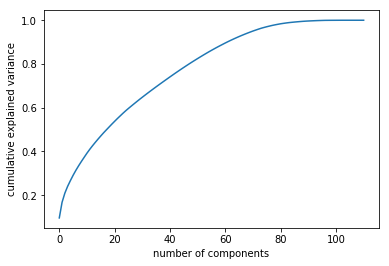

In [114]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca_ind.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

- Graficamos el acumulado de varianza para las dimensiones del hogar

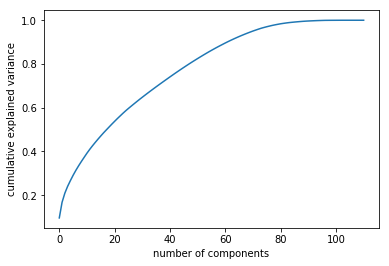

In [116]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca_hog.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [107]:
fa = FactorAnalysis(n_components=7, random_state=0)
fa_ind = fa.fit_transform(_ds_ind)
fa_hog = fa.fit_transform(_ds_hog)

In [112]:
fa_ind

array([[ 0.57025096, -1.39434896, -0.27611177, ...,  0.0979446 ,
         0.71898406,  0.21423217],
       [-1.12278667, -0.1023088 , -0.03104926, ..., -0.61576174,
        -0.46986317, -0.28861114],
       [ 0.00570677,  0.41450045,  2.09366153, ..., -0.38505019,
        -1.49063101, -1.5375421 ],
       ...,
       [ 0.00554897, -0.74498567, -0.55662304, ..., -0.42411666,
         0.6793377 , -0.72288167],
       [ 0.57086403, -1.14263075,  1.59232869, ...,  0.76978511,
        -0.69208855, -0.12224307],
       [-0.55808468, -0.75167209,  0.24946202, ..., -0.14730511,
        -0.68394096, -0.11526488]])

Si se animan, pueden usar una red neuronal como encoder para la reducción de dimensionalidad.

***Hint: *** [En el siguiente link](https://medium.com/intuitive-deep-learning/autoencoders-neural-networks-for-unsupervised-learning-83af5f092f0b)

### 2.  K-Means Clustering

A continuación se aplicará K-Means para clasificar en clusters nuestros datasets.

In [ ]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(_ds_individuo)

clusters = km.labels_.tolist()

In [ ]:
print (clusters)

# Recuento del número de elementos en cada cluster
for i in range(num_clusters):
    print ('El cluster %i tiene %i elementos' % (i, clusters.count(i)))

In [9]:
# Agrupar por clusters y clases los datasets, utilizando .count()
_ds_individuo['cluster'] = clusters
_ds_individuo['cluster'].value_counts()


In [ ]:
# Calcular estadísticos relevantes para variables clave del dataset, diferenciados por cada cluster
# Pueden usar .describe()

In [ ]:
# Para encontrar los centroides y analizarlos pueden utilizar lo siguiente:
centroids = km.cluster_centers_   # centroids = km.centroids
order_centroids = centroids.argsort()[:, ::-1]

In [ ]:
# Aplicar método de Elbow para identificar el número de clusters óptimo
n = 
sum_sq_dist = []
list_k = list(range(1, n))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(_ds_individual)
    sum_sq_dist.append(km.inertia_)

In [ ]:
# Calcular la métrica de la silueta. Pueden usar los módulos silhouette_samples y silhouette_score

silhouette_vals = silhouette_samples(_ds_individual, clusters)

Graficar diferentes variables de interés por cluster y por clase, y compararlos.

En caso de que hayan dividido en Train/Test los datasets y utilizado la misma cantidad de clusters que de clases en las etiquetas originales, pueden calcular las métricas convencionales. Graficar clusters versus clases originales.